**INSTRUCTIONS**



1.  The assignment contains four questions. A few bonus questions are mentioned. 
2.   This assignment is due on **6th Feb, 23:59 **(**No Further extensions**).
3.   Assignment must be implemented in Python 3 only.
4.   You are allowed to use libraries for data preprocessing (numpy, pandas etc) and for evaluation metrics, data visualization (matplotlib etc.).
5.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
6.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
7.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
8.   Any attempts at **plagiarism will be penalized heavily**.
9.   Make sure you run and save your notebooks before submission.
10.  For question 3 of the Decision Trees section, output your model's depth first traversal into ```outputimp.txt``` and submit it along with the ipynb file.
10. Naming convention for the ipynb file is ```<roll_number>_assign1.ipynb```
11. Compress your submission files into a zip file with the naming convention: ```<roll_number>_assign1.zip``` and submit in the portal.

#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [1]:
# To read data from diamonds.csv
import pandas as pd
import math 
import numpy as np
import time
import matplotlib.pyplot as plt
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]
data.describe()
data_one_hot = data



```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [2]:
"""
CONVERSION FROM CATEGORICAL TO ORDINAL
"""
from sklearn.preprocessing import OrdinalEncoder
cut = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
color = [(chr(ord("J")-i)) for i in range(7)]
clarity = ["I1" , "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF" ]
ordi = OrdinalEncoder(categories=[cut,color,clarity])
ordi.fit(data[['cut','color','clarity']])
data[['cut','color','clarity']] =  ordi.transform(data[['cut','color','clarity']])
for col in data.columns:
    data[col] = pd.to_numeric(data[col])

In [3]:

"""
HELPER FUNCTIONS:
"""
def min_max_scaler(X):
    return (X-X.min())/(X.max()-X.min())
def euclid_distane(point1, point2):
    return (np.sqrt(np.sum((point1-point2)**2,axis=1)))
def manhattan_distance(point1,point2):
    return (np.sum(np.absolute(point1-point2),axis=1))
def hamming_distance(point1,point2):
    return np.sum(point1 == point2,axis=1)

def mse(actual,predicted):
    return (np.mean(np.power(actual-predicted,2)))
def mae(actual,predicted):
    return np.mean(np.absolute(predicted - actual))
def r2(actual,predicted):
    return 1-np.divide(np.sum(np.subtract(actual,predicted)**2),np.sum(np.subtract(actual,np.mean(actual))**2))

In [4]:
"""
MAIN KNN ALGORITHM
PARAMTERES: 
- LIST OF K'S TO RUN
- TRAINING X AND Y
- TESTING X
- LIST OF INDICES OF CATEGORICAL VARIABLES
"""
def knn_regressor(k_list,train_x,train_y,input_x,cat_variables_list):
    txnp = train_x.to_numpy()
    tynp = train_y.to_numpy()
    ixnp = input_x.to_numpy()
    predicted_y_euclid = np.zeros((len(input_x),len(k_list))) 
    predicted_y_mannhatan = np.zeros((len(input_x),len(k_list)))
    i = 0
    
    cat_data_tx = txnp[:,cat_variables_list]
    cat_data_ix = ixnp[:,cat_variables_list] 

    for point in ixnp:
            distance_vector = euclid_distane(np.delete(txnp,cat_variables_list,1),np.delete(point,cat_variables_list).reshape(1,-1))
            cat_point = point[cat_variables_list].reshape(1,-1)
            
            manhattan_d = manhattan_distance(cat_data_tx,cat_point)
            euclid_d = euclid_distane(cat_data_tx,cat_point)
            

            j=0
            for k in k_list:      
                k_indexes_e = np.argpartition(np.add(distance_vector,euclid_d),k)[0:k]
                k_indexes_m = np.argpartition(np.add(distance_vector,manhattan_d),k)[0:k]
                
                predicted_y_euclid[i][j] =np.mean(tynp[k_indexes_e])
                predicted_y_mannhatan[i][j] =np.mean(tynp[k_indexes_m])
                j+=1
                      
            i+=1
    return predicted_y_euclid,predicted_y_mannhatan





In [8]:
# UN-NORMALISED DATA
from sklearn.model_selection import train_test_split

X = data.iloc[:,data.columns != "price"]
Y = data.iloc[:,data.columns == "price"]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.1)
x_train, x_val, y_train, y_val_U = train_test_split(x_train,y_train,test_size=0.1)
start = time.time()
predicted_y_e_U , predicted_y_mannhatan_U = knn_regressor([2,3,5,7,11,16],x_train,y_train,x_val,np.array([1,2,3]))
end = time.time()
print("RAN for "+str(end-start)+"s")

RAN for 53.10304832458496s


In [9]:
# NORMALISED DATA
from sklearn.model_selection import train_test_split

X = data.iloc[:,data.columns != "price"]
Y = data.iloc[:,data.columns == "price"]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1)
X = min_max_scaler(X)
start = time.time()
predicted_y_e ,  predicted_y_mannhatan = knn_regressor([2,3,5,7,11,16],x_train,y_train,x_val,np.array([1,2,3]))
end = time.time()
print("RAN for "+str(end-start)+"s")

RAN for 56.325448751449585s


1. b) Do we need to normalise data? [If so Does it make any difference?].


In [10]:
print("\tUNORMALISED\tNormalised")
print("r2",r2(y_val_U,predicted_y_e_U[:,0].reshape(-1,1))[0],"\t", r2(y_val,predicted_y_e[:,0].reshape(-1,1))[0])
print("mae",mae(y_val_U,predicted_y_e_U[:,0].reshape(-1,1))[0],"\t", mae(y_val,predicted_y_e[:,0].reshape(-1,1))[0])
print("mse",mse(y_val_U,predicted_y_e_U[:,0].reshape(-1,1))[0],"\t", mse(y_val,predicted_y_e[:,0].reshape(-1,1))[0])


	UNORMALISED	Normalised
r2 0.9342192364240739 	 0.9460905668087041
mae 534.3345005149331 	 491.98311019567456
mse 1111238.213800206 	 852394.4762100927


**Ans**: 
As seen in the above figures the prediction on an unnormalised data is way off this is because the ranges of different features are different and thus weights of each feature has aneffect if not normalised.

2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

In [11]:
print("K=2\t  EUCLID\t\tMANHATTAN")
print("r2\t",r2(y_val,predicted_y_e[:,0].reshape(-1,1))[0],"\t", r2(y_val,predicted_y_mannhatan[:,0].reshape(-1,1))[0])
print("mae\t",mae(y_val,predicted_y_e[:,0].reshape(-1,1))[0],"\t", mae(y_val,predicted_y_mannhatan[:,0].reshape(-1,1))[0])
print("mse\t",mse(y_val,predicted_y_e[:,0].reshape(-1,1))[0],"\t", mse(y_val,predicted_y_mannhatan[:,0].reshape(-1,1))[0])

print("\nK=5\t  EUCLID\t\tMANHATTAN")
print("r2\t",r2(y_val,predicted_y_e[:,2].reshape(-1,1))[0],"\t", r2(y_val,predicted_y_mannhatan[:,2].reshape(-1,1))[0])
print("mae\t",mae(y_val,predicted_y_e[:,2].reshape(-1,1))[0],"\t", mae(y_val,predicted_y_mannhatan[:,2].reshape(-1,1))[0])
print("mse\t",mse(y_val,predicted_y_e[:,2].reshape(-1,1))[0],"\t", mse(y_val,predicted_y_mannhatan[:,2].reshape(-1,1))[0])


K=2	  EUCLID		MANHATTAN
r2	 0.9460905668087041 	 0.9422249005279154
mae	 491.98311019567456 	 499.31101956745624
mse	 852394.4762100927 	 913516.8510813594

K=5	  EUCLID		MANHATTAN
r2	 0.952309969687852 	 0.9501774110042306
mae	 476.5273738414006 	 483.9161688980433
mse	 754055.7561441812 	 787774.924284243


**Ans: For the given data**
- The `r2 score`, `mae` and `mse` all were less while taking the euclid distance as compared to manhattan
- All the errors were decresed for `K=5` as compared to `K=2` in both the distance computation methods

3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [12]:
print("K\t\tMSE\t\t\tMAE\t\t\tR2")
print("2\t",mse(y_val,predicted_y_e[:,0].reshape(-1,1))[0],"\t", mae(y_val,predicted_y_e[:,0].reshape(-1,1))[0],"\t",r2(y_val,predicted_y_e[:,0].reshape(-1,1))[0])
print("3\t",mse(y_val,predicted_y_e[:,1].reshape(-1,1))[0],"\t", mae(y_val,predicted_y_e[:,1].reshape(-1,1))[0],"\t",r2(y_val,predicted_y_e[:,1].reshape(-1,1))[0])
print("5\t",mse(y_val,predicted_y_e[:,2].reshape(-1,1))[0],"\t", mae(y_val,predicted_y_e[:,2].reshape(-1,1))[0],"\t",r2(y_val,predicted_y_e[:,2].reshape(-1,1))[0])
print("7\t",mse(y_val,predicted_y_e[:,3].reshape(-1,1))[0],"\t", mae(y_val,predicted_y_e[:,3].reshape(-1,1))[0],"\t",r2(y_val,predicted_y_e[:,3].reshape(-1,1))[0])
print("11\t",mse(y_val,predicted_y_e[:,4].reshape(-1,1))[0],"\t", mae(y_val,predicted_y_e[:,4].reshape(-1,1))[0],"\t",r2(y_val,predicted_y_e[:,4].reshape(-1,1))[0])
print("16\t",mse(y_val,predicted_y_e[:,5].reshape(-1,1))[0],"\t", mae(y_val,predicted_y_e[:,5].reshape(-1,1))[0],"\t",r2(y_val,predicted_y_e[:,5].reshape(-1,1))[0])


K		MSE			MAE			R2
2	 852394.4762100927 	 491.98311019567456 	 0.9460905668087041
3	 788584.4871495594 	 482.10738070717474 	 0.9501262104434339
5	 754055.7561441812 	 476.5273738414006 	 0.952309969687852
7	 730670.0156455579 	 472.9084596145358 	 0.953788993837146
11	 752266.5571030973 	 477.41831289205135 	 0.952423127044995
16	 791806.3818687242 	 487.0385298661174 	 0.9499224426774995


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

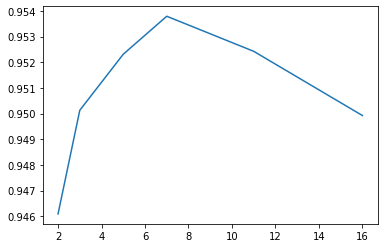

In [13]:

k = [2,3,5,7,11,16]


k_score = []
for i in range(6):
    k_score.append(r2(y_val,predicted_y_e[:,i].reshape(-1,1))[0])
plt.plot(k,k_score)
plt.show()
   

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

ANS: **As seen in the above plot the R2 value changes it reaches a maxima because for small k values the model is overfitted and for large k values even the points which are distanct impacts the value for the prediction.
The k- values can be computed using a n fold cross validation leave one out method method. In which we compute errors for different k values by spliting the training data into validation and training.**

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [14]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(x_train, y_train)
y_pred_sklearn = regressor.predict(x_test.to_numpy())
print("MAE:",mae(y_pred_sklearn,y_test)[0])
print("MSE:",mse(y_pred_sklearn,y_test)[0])
print("R2:",r2(y_pred_sklearn,y_test)[0])

MAE: 471.58813496477563
MSE: 750076.7264961067
R2: 0.9498975397976617


5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [15]:
print("\t\tSklearn\t\tOur KNN model")
print("MAE:\t",mae(y_pred_sklearn,y_test)[0],"\t",mae(y_val,predicted_y_e[:,2].reshape(-1,1))[0])
print("MSE:\t",mse(y_pred_sklearn,y_test)[0],"\t",mse(y_val,predicted_y_e[:,2].reshape(-1,1))[0])
print("R2:\t",r2(y_pred_sklearn,y_test)[0],"\t",r2(y_val,predicted_y_e[:,2].reshape(-1,1))[0])

		Sklearn		Our KNN model
MAE:	 471.58813496477563 	 476.5273738414006
MSE:	 750076.7264961067 	 754055.7561441812
R2:	 0.9498975397976617 	 0.952309969687852


6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


ANS:
- **Advantage**
No training time is required in KNN, it also gives good prediction in non linear data
- **Disadvantage**
For each prediction the distance has to computed for the whole data set

# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


In [16]:
"""
LINEAR REGRESSION:
- ALGORITHM
- TRAINING
"""

from sklearn.model_selection import train_test_split

X = data.iloc[:,data.columns != "price"]
Y = data.iloc[:,data.columns == "price"]
X = min_max_scaler(X)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.1)

X_train = x_train.to_numpy()
Y_train = y_train.to_numpy()
X_test = x_test.to_numpy()
Y_test = y_test.to_numpy()
W = np.zeros((len(X_train[0]),1))
w_ = np.random.rand()

def pred_y(W,w_,x_train):
    return np.add(np.matmul(x_train,W),w_)

def cost_func(W,w_,X,Y):
    m = len(X[:,0])
    return 0.5/m*np.sum(np.subtract(pred_y(W,w_,X),Y)**2)

def train(W,w_,X,Y,l,epoch):
    m = len(X[:,0])
    for i in range(epoch):

        tempW = W - l/m * np.matmul(X.transpose(), (pred_y(W,w_,X) - Y))
        tempw_ = w_ - l/m * np.sum((pred_y(W,w_,X) - Y))

        W,w_ = tempW,tempw_

    return W,w_

start = time.time()
z,z_= train(W,w_,X_train,Y_train,0.7,25000)
end = time.time()
print("Training ran for:",end-start)



Training ran for: 51.36510753631592


In [17]:
val_without_feature = pred_y(z,z_,X_test)
print("MAE:",mae(val_without_feature,Y_test))
print("MSE:",mse(val_without_feature,Y_test))
print("R2:",r2(val_without_feature,Y_test))

MAE: 790.331673385602
MSE: 1340142.08466914
R2: 0.9093801450450212


2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

In [18]:
data.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


As in the above figure we can see that the price is correlated with `x,y,z` but as these values are also highly corelated with each other, I took only one of them. Also `clarity` and `depth` are not correlated with `price` so I also removed them

In [19]:
X_features_train = X_train[:,[0,1,2,4,6]]
X_features_test = X_test[:,[0,1,2,4,6]]
W = np.zeros((len(X_features_train[0]),1))
w_ = np.random.rand()
start = time.time()
z,z_= train(W,w_,X_features_train,Y_train,0.7,25000)
end = time.time()
print("Training ran for:",end-start)

Training ran for: 33.22360301017761


In [20]:
val_with_feature = pred_y(z,z_,X_features_test)
print("MAE:",mae(val_with_feature,Y_test))
print("MSE:",mse(val_with_feature,Y_test))
print("R2:",r2(val_with_feature,Y_test))

MAE: 866.2354104022168
MSE: 1838757.3065374494
R2: 0.8703267148017573


Explanation for 2b) - 

2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_features_train,Y_train)
val_sk = reg.predict(X_features_test)

In [22]:
print("\t\tWITH FEATURE SELECTION\n")
print("\t\tOur model\t\tSklearn")
print("MAE:\t",mae(val_with_feature,Y_test),"\t",mae(val_sk,Y_test))
print("MSE:\t",mse(val_with_feature,Y_test),"\t",mse(val_sk,Y_test))
print("R2:\t",r2(val_with_feature,Y_test),"\t",r2(val_sk,Y_test))

		WITH FEATURE SELECTION

		Our model		Sklearn
MAE:	 866.2354104022168 	 863.0550474840093
MSE:	 1838757.3065374494 	 1836402.7779856683
R2:	 0.8703267148017573 	 0.8707187083943482


2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,Y_train)
val_sk = reg.predict(X_test)

In [24]:
print("\t\tWITHOUT FEATURE SELECTION\n")
print("\t\tOur model\t\tSklearn")
print("MAE:\t",mae(val_without_feature,Y_test),"\t",mae(val_sk,Y_test))
print("MSE:\t",mse(val_without_feature,Y_test),"\t",mse(val_sk,Y_test))
print("R2:\t",r2(val_without_feature,Y_test),"\t",r2(val_sk,Y_test))

		WITHOUT FEATURE SELECTION

		Our model		Sklearn
MAE:	 790.331673385602 	 787.7682324918503
MSE:	 1340142.08466914 	 1338082.4655266814
R2:	 0.9093801450450212 	 0.9096376478125443


ANS: **Adding features resulted in lesser error, and our model was able to predict quite similar to sklearn linear regression model**

2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


In [25]:
predicted_y_e ,  _ = knn_regressor([5],x_train,y_train,x_test,np.array([1,2,3]))

In [26]:
print("\t\tLinear Regression\t\tKNN")
print("MAE:\t\t",mae(val_without_feature,Y_test),"\t",mae(predicted_y_e,Y_test))
print("MSE:\t\t",mse(val_without_feature,Y_test),"\t",mse(predicted_y_e,Y_test))
print("R2:\t\t",r2(val_without_feature,Y_test),"\t",r2(predicted_y_e,Y_test))

		Linear Regression		KNN
MAE:		 790.331673385602 	 356.4255098257323
MSE:		 1340142.08466914 	 490594.31117537996
R2:		 0.9093801450450212 	 0.9679460203446004


Explanation - **For the following data set KNN gives better result as compared to linear regression as seen in the above table but this is not always correct. Also KNN takes a lot of time for prediction which isn't the case in Linear regression**

2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


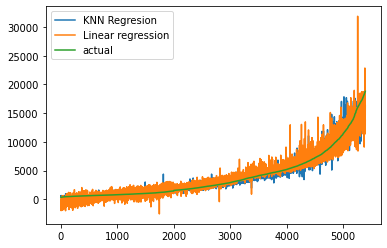

In [27]:
sorted_indices = np.argsort(Y_test.ravel())
Y_test_sort = Y_test[sorted_indices]
predicted_y_e_sorted = predicted_y_e[sorted_indices]
val_without_feature_sorted = val_without_feature[sorted_indices]
i=np.linspace(0,5394,5394)
plt.plot(i,predicted_y_e_sorted,label="KNN Regresion")
plt.plot(i,val_without_feature_sorted,label="Linear regression")
plt.plot(i,Y_test_sort,label="actual")
plt.legend()

#**KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [28]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2021-02-02 12:35:48--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  7.38MB/s    in 30s     

2021-02-02 12:36:19 (5.37 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [29]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

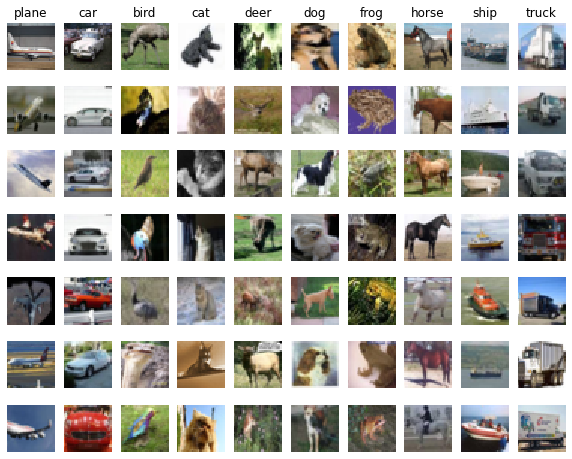

In [30]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [31]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In the next cell you are going to implement the main KNearestNeighbor class and keep adding functions to it as and when required in the subsequent steps.

In [32]:
class KNearestNeighbor():    
    def distance_with_one_loop(self,X_test):
#         print(X_test.shape,self.X_train.shape)
        n,_ = X_test.shape
        m,_ = self.X_train.shape
        dist = np.zeros((n,m))
#         print(dist.shape)
        x= 0
        for i in X_test:
            dist[x] = np.sqrt(np.sum((self.X_train-i)**2,axis=1))
            x+=1
        return(dist)
    
    def distance_with_two_loops(self,X_test):
#         print(X_test.shape,self.X_train.shape)
        n,_ = X_test.shape
        m,_ = self.X_train.shape
        dist = np.zeros((n,m))
#         print(dist.shape)
        x= 0
       
        for i in X_test:
            y=0
            for j in self.X_train:
#                print(np.sqrt(np.sum((j-i)**2)))
                dist[x][y] = np.sqrt(np.sum((j-i)**2))
                y+=1
            x+=1
        return(dist)
    
    
    def distance_with_no_loop(self,X_test):
        X_dash = np.sum(X_test**2,axis=1).reshape(-1,1)
        X_ = np.sum(self.X_train**2,axis=1)
        X_X_dash = np.multiply(-2,(np.matmul(X_test,self.X_train.transpose() )))
        val = np.sqrt(X_X_dash+X_dash+X_)
        return val
    
    def train(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train   
        
    def predict_labels(self,dists, k):
        n,_ = dists.shape
        predy =np.zeros(n)
        
        y=0
        for i in range(n):
#             nd = np.argpartition(dists[i],k)[0:k]
#             pred[j] = np.bincount(y_train[ind].transpose()[0]).argmax()
            
            index = np.argpartition(dists[i],k)[0:k].reshape(-1,1)
            
            predy[y] = float(np.bincount(self.y_train[index].transpose()[0]).argmax())
            y+=1  
        return predy
        
    def __init__(self):
        pass

Go back to KNearestNeighbor class and add a method to train the classifier. Your function will be called as below. In KNN classifier, this step is a simple memorization of the training data.

In [33]:
# Make sure to add train() in the classifier class before executing this cell
classifier = KNearestNeighbor()
classifier.train(X_train,y_train)

Go back to KNearestNeighbor class and add a method to compute distances between each pair of test image and train image. You can use two loops to do this. Remember we are using standard L-2 distance metric. Precisely your method should return a distance matrix($D$) where $D(i,j)$ = **L-2** distance between the $i^{th}$ test image and the $j^{th}$ train image. Your function will be called as below

Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [34]:
import time
time_loops = []
start = time.time()
dists = classifier.distance_with_two_loops(X_test)
end = time.time()
time_loops += [start-end]
print("Two loop ran for:", end-start)
start = time.time()
dists = classifier.distance_with_one_loop(X_test)
end = time.time()
time_loops += [start-end]

print("One loop ran for:",end-start)
start = time.time()
dists = classifier.distance_with_no_loop(X_test)
end = time.time()
time_loops += [start-end]

print("No loop ran for:",end-start)

Two loop ran for: 48.313669204711914
One loop ran for: 35.675132751464844
No loop ran for: 0.5302917957305908


Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch



Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [35]:
print("Two loop ran for: ",-time_loops[0])
print("One loop ran for: ",-time_loops[1])
print("No loop ran for: ",-time_loops[2])


Two loop ran for:  48.313669204711914
One loop ran for:  35.675132751464844
No loop ran for:  0.5302917957305908


In [36]:
dists = classifier.distance_with_no_loop(X_test)
ks = [1,3,5,7]
# print(dists.shape)
for ki in ks:
    y_test_pred = classifier.predict_labels(dists, k=ki)
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    print('for k %d Got %d / %d correct => accuracy: %f' % (ki,num_correct, num_test, accuracy))

for k 1 Got 137 / 500 correct => accuracy: 0.274000
for k 3 Got 136 / 500 correct => accuracy: 0.272000
for k 5 Got 139 / 500 correct => accuracy: 0.278000
for k 7 Got 137 / 500 correct => accuracy: 0.274000


ANS: **The computation of distance matrix wont depend on k as we are not using k's value while finding the distance matrix. The k value is only used while predicting. Hence it will impact the prediction time not the distance computation time**

As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

In [37]:
# Use this cell to implement Cross Validation


from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle= True )
col = np.column_stack((X_train,y_train))
ks = [1,2,3,4,5,6,7,8,9]
avg_acc = []
std_acc = []
for ki in ks:
    accuracies = []
    for train,test in kf.split(col):
        fold_x_train = col[train]
        fold_y_train = col[train]
        fold_x_train = fold_x_train[:,:-1]
        fold_y_train = fold_y_train[:,-1].astype('int')
#         print(fold_x_train.shape,fold_y_train.shape)
        kc = KNearestNeighbor()
        kc.train(fold_x_train,fold_y_train)
        fold_y_test = col[test][:,-1]
        fold_x_test = col[test][:,:-1]
        distance_vector = kc.distance_with_no_loop(fold_x_test)
        fold_y_pred = kc.predict_labels(distance_vector, k=ki)
        num_correct = np.sum(fold_y_pred == fold_y_test)
        accuracies += [float(num_correct) / len(fold_y_test)]
    avg_acc += [np.mean(accuracies)]
    std_acc += [np.std(accuracies)]


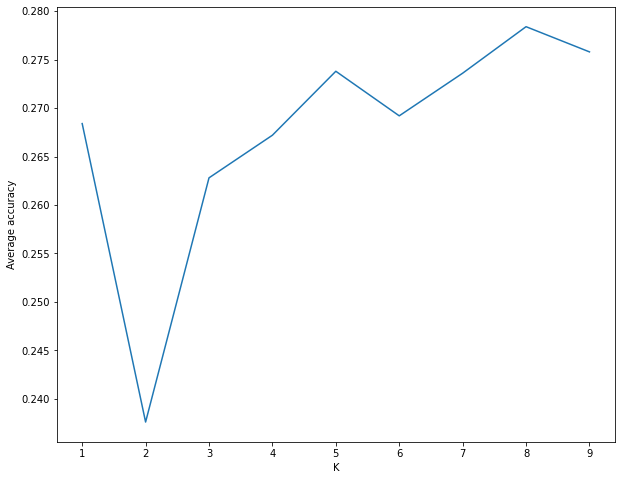

In [38]:
plt.plot(ks,avg_acc)
plt.xlabel("K")
plt.ylabel("Average accuracy")
plt.show()

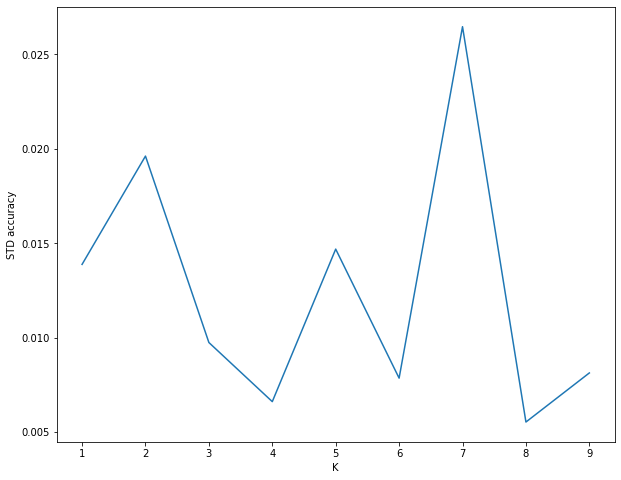

In [39]:
plt.plot(ks,std_acc)
plt.xlabel("K")
plt.ylabel("STD accuracy")

plt.show()

In this last part of the notebook you are expected to do the following and present appropriate reports/results:

1. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
2. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
3. What is the time complexity of training using KNN classifier? What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?
4. Bonus: Explore what image features you can use to better the performance of KNN classifier.




# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


In [40]:
import pandas as pd
import numpy as np

headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data.describe()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


1. a) Implement a decision tree(from scratch using only python data structures) as a class.

In [41]:
"""
SPLITTING DATA INTO TEST, TRAIN AND VALIDATION
"""
import sklearn.model_selection
data_normalised = min_max_scaler(data)
data_train, data_test = sklearn.model_selection.train_test_split(data,test_size=0.2)
data_train, data_val = sklearn.model_selection.train_test_split(data_train,test_size=0.2)
data_train_n, data_test_n = sklearn.model_selection.train_test_split(data_normalised,test_size=0.2)
data_train_n, data_val_n = sklearn.model_selection.train_test_split(data_train_n,test_size=0.2)

In [42]:
"""
CLASS:
- TREE NODE: for a node of tree
- DECISION TREE: implementation of decision tree with different criteria including helper functions
"""
class tree_node:
    def __init__(self,data,left="",right=""):
        self.data = data
        self.left = left
        self.right = right

class decision_tree:
    def __init__(self,data,predict_col,max_depth=5,threshold=1):
        self.data = data
        self.max_depth = max_depth
        self.threshold = threshold
        self.pred_col = predict_col
        self.root = tree_node("")
        
    def fit_entropy(self):
        self.root = self.train_entropy(self.data,0)
        return self.root
    def fit_gini(self):
        self.root = self.train_gini(self.data,0)
        return self.root
    def fit_miss(self):
        self.root = self.train_miss(self.data,0)
        return self.root
        
    def train_entropy(self,data,counter):
        if (self.is_pure(data)) or (len(data) < self.threshold) or (counter == self.max_depth):
            return tree_node(self.classify(data))
        else:
            counter+=1
            
            col ,col_val,e= self.best_split_entropy(data)
            data_true, data_false = self.split(data,col,col_val)

            left = self.train_entropy(data_true,counter)
            right = self.train_entropy(data_false,counter)

            
            if (left.data == right.data) and ("==" not in  str(left.data)) : 
                return tree_node(left.data)
            data = "{}=={}".format(col,col_val)
            return tree_node(data,left,right)
    def train_gini(self,data,counter):
        if (self.is_pure(data)) or (len(data) < self.threshold) or (counter == self.max_depth):
            return tree_node(self.classify(data))
        else:
            counter+=1
            
            col ,col_val,e= self.best_split_gini(data)
#             print(col,col_val,e)
            data_true, data_false = self.split(data,col,col_val)
            left = self.train_gini(data_true,counter)
            right = self.train_gini(data_false,counter)
            
            if (left.data == right.data) and ("==" not in  str(left.data)) : 
#                 print("same",left.data,col,col_val,e)
                return tree_node(left.data)
            data = "{}=={}".format(col,col_val)
            return tree_node(data,left,right)
    def train_miss(self,data,counter):
        if (self.is_pure(data)) or (len(data) < self.threshold) or (counter == self.max_depth):
            return tree_node(self.classify(data))
        else:
            counter+=1
            
            
            col ,col_val,e= self.best_split_miss(data)
            data_true, data_false = self.split(data,col,col_val)
#             print(col,col_val,e,len(data_true),len(data_false))
            
            left = self.train_miss(data_true,counter)
            right = self.train_miss(data_false,counter)
            
            if (left.data == right.data) and ("==" not in  str(left.data)) : 
#                 print("same",col,col_val,e,len(data_true),len(data_false))
                return tree_node(left.data)
            data = "{}=={}".format(col,col_val)
            return tree_node(data,left,right)
         

            
        
    def classify(self, data):
        if(len(data) == 0): return 2
        unique_y,count = np.unique(data[self.pred_col],return_counts=True)
        return unique_y[np.argmax(count)]
    
    def potential_splits(self,data,col):
        return sorted(data[col].unique())
    
    def get_entropy(self, data):
        p = (data[self.pred_col].value_counts()/len(data))
        return sum(p*-np.log2(p))
    def get_miss(self, data):

        p = (data[self.pred_col].value_counts()/len(data)).to_numpy().reshape(-1,1)
        x,_ = p.shape

        if(x==0): return 0

        p = np.insert(p,1,(1-p).flatten(),axis=1)
        p = np.max(p)

        
        return np.sum(1-p)
    
    def get_gini_index(self,data):
        p = (data[self.pred_col].value_counts()/len(data))
        return sum(p*(1-(p)))

    def calculate_entrory(self, data_true,data_false):
        t,f = len(data_true) , len(data_false)
        n = t+f
        return t/n*(self.get_entropy(data_true))+f/n*(self.get_entropy(data_false))
    def calculate_miss(self, data_true,data_false):
        t,f = len(data_true) , len(data_false)
        n = t+f
        return t/n*(self.get_miss(data_true))+f/n*(self.get_miss(data_false))

    def calculate_gini_index(self,data_true,data_false):
        t,f = len(data_true) , len(data_false)
        n = t+f
        return t/n*(self.get_gini_index(data_true))+f/n*(self.get_gini_index(data_false))
    def best_split_entropy(self, data):
#         print(data.describe())
        col,col_val = "",""
        min_entropy = 99 
        for column in data.columns:
            if(column != self.pred_col):
                for col_value in self.potential_splits(data,column):
                    data_true, data_false = self.split(data,column,col_value)
            
                    e = self.calculate_entrory(data_true,data_false)
                    if(e < min_entropy):
                        col , col_val, min_entropy = column, col_value, e
                        
                  
        return col,col_val,min_entropy
    def best_split_miss(self, data):
        col,col_val = "",""
        min_entropy = 99 
        for column in data.columns:
            if(column != self.pred_col):
                for col_value in self.potential_splits(data,column):
                    data_true, data_false = self.split(data,column,col_value)
            
                    e = self.calculate_miss(data_true,data_false)
                    if(e < min_entropy):
                        col , col_val, min_entropy = column, col_value, e
                  
        return col,col_val,min_entropy
    
    def best_split_gini(self, data):
        col,col_val = "",""
        min_entropy = 99 
        for column in data.columns:
            if(column != self.pred_col):
                for col_value in self.potential_splits(data,column):
                    data_true, data_false = self.split(data,column,col_value)
            
                    e = self.calculate_gini_index(data_true,data_false)
                    if(e < min_entropy):
                        col , col_val, min_entropy = column, col_value, e
                  
        return col,col_val,min_entropy
    
    def split(self, data ,col_no, col_value):
        t,f =  data[data[col_no] == col_value], data[data[col_no] != col_value]        
        return t,f

    def is_pure(self, data):        
        unique_y = data[self.pred_col].unique()
        return len(unique_y) == 1

In [43]:
"""
HELPER FUNCTIONS:
- prediction
- DFS traversal
"""
def pred(data_row,tree):
    if "==" not in str(tree.data): return tree.data
    else:
        
        col,col_value = tree.data.split("==")
        if (data_row[col] == float(col_value)): return pred(data_row,tree.left)
        else: return pred(data_row,tree.right)

def dfs(node,i,filepointer):
    s = ""
    for x in range(i):s+="\t"
    filepointer.write(s+str(node.data)+"\n")
    if(node.left !=""): 
        filepointer.write(s+"TRUE Branch\n")
        dfs(node.left,i+1,filepointer)
    if(node.right !=""):
        filepointer.write(s+"FALSE Branch\n")
        dfs(node.right,i+1,filepointer)

In [44]:
"""
getting the hyper parameter 
"""
depths = [2,4,5,7,10]
threasholds = [2,4,5]
validation = {}
for depth in depths:
    for threshold in threasholds:
        d = decision_tree(data_train,"Diagnosis",max_depth=depth,threshold=threshold)
        x1 = time.time()
        tree_entropy = d.fit_entropy()
        x2 = time.time()
        tree_gini = d.fit_gini()
        x3 = time.time()
        tree_miss = d.fit_miss()
        x4 = time.time()
        pred_class_ent = data_val.apply(pred,tree=tree_entropy,axis=1)
        pred_class_gini = data_val.apply(pred,tree=tree_gini,axis=1)
        pred_class_miss = data_val.apply(pred,tree=tree_miss,axis=1)
        error = [1-np.sum(pred_class_ent.to_numpy() != data_val.iloc[:,-1].to_numpy())/len(data_val),
                 1-np.sum(pred_class_gini.to_numpy() != data_val.iloc[:,-1].to_numpy())/len(data_val),
                 1-np.sum(pred_class_miss.to_numpy() != data_val.iloc[:,-1].to_numpy())/len(data_val)]
        validation["depth = "+str(depth)+" threshold = "+str(threshold)] = error

max_acc = 0
final_dt = ""
for dt in validation.keys():
    if max_acc < max(validation[dt]):
        final_dt = dt
        max_acc = max(validation[dt])
print("Best hyperparameter: ",final_dt,max_acc)

Best hyperparameter:  depth = 5 threshold = 2 0.9375


1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [46]:
"""
TRAINING AND CALCULATING ERROR:
- depth = 5
- purity_measure = 2
"""
d = decision_tree(data_train,"Diagnosis",max_depth=5,threshold=2)
x1 = time.time()
tree_entropy = d.fit_entropy()
x2 = time.time()
print("Entropy ran for:",x2-x1)
tree_gini = d.fit_gini()
x3 = time.time()
print("Gini ran for:",x3-x2)
tree_miss = d.fit_miss()
x4 = time.time()
print("Missclassification ran for",x4-x3)

Entropy ran for: 3.001664161682129
Gini ran for: 2.842646360397339
Missclassification ran for 2.687985420227051


1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

In [47]:
pred_class_ent = data_test.apply(pred,tree=tree_entropy,axis=1)
pred_class_gini = data_test.apply(pred,tree=tree_gini,axis=1)
pred_class_miss = data_test.apply(pred,tree=tree_miss,axis=1)
error = [1-np.sum(pred_class_ent.to_numpy() != data_test.iloc[:,-1].to_numpy())/len(data_test),
         1-np.sum(pred_class_gini.to_numpy() != data_test.iloc[:,-1].to_numpy())/len(data_test),
         1-np.sum(pred_class_miss.to_numpy() != data_test.iloc[:,-1].to_numpy())/len(data_test)]
print( "entropy \t\t Gini \t\t\t misclassification rate")
print(error[0],"\t\t",error[1],"\t\t",error[2])

entropy 		 Gini 			 misclassification rate
0.9357142857142857 		 0.95 		 0.9571428571428572


1. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

In [48]:
print( "\t\t\t\t entropy \t Gini \t misclassification rate")
for dt in validation:
    print(dt,"\t",round(validation[dt][0],4),"\t",round(validation[dt][1],4),"\t",round(validation[dt][2],4))

				 entropy 	 Gini 	 misclassification rate
depth = 2 threshold = 2 	 0.9196 	 0.9196 	 0.9196
depth = 2 threshold = 4 	 0.9196 	 0.9196 	 0.9196
depth = 2 threshold = 5 	 0.9196 	 0.9196 	 0.9196
depth = 4 threshold = 2 	 0.9107 	 0.9286 	 0.9286
depth = 4 threshold = 4 	 0.9107 	 0.9286 	 0.9286
depth = 4 threshold = 5 	 0.9107 	 0.9286 	 0.9286
depth = 5 threshold = 2 	 0.9196 	 0.9286 	 0.9375
depth = 5 threshold = 4 	 0.9196 	 0.9286 	 0.9375
depth = 5 threshold = 5 	 0.9196 	 0.9286 	 0.9375
depth = 7 threshold = 2 	 0.9196 	 0.9286 	 0.9375
depth = 7 threshold = 4 	 0.9196 	 0.9286 	 0.9375
depth = 7 threshold = 5 	 0.9196 	 0.9286 	 0.9375
depth = 10 threshold = 2 	 0.9107 	 0.9196 	 0.9286
depth = 10 threshold = 4 	 0.9107 	 0.9196 	 0.9286
depth = 10 threshold = 5 	 0.9018 	 0.9196 	 0.9286


1. e) Does standardisation and normalisation help in this case? Report

Answer:
`The normalisation wont have a effect as here weights of individual features wont matter because we are splitting according to a citeria(gini,entropy,missclassification rate) which does not involve weight. The normalisation only plays a role where we are determining the weight according to a feature`

2. Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

In [49]:
from sklearn.tree import DecisionTreeClassifier
xtrain,ytrain = data_train.iloc[:,data_train.columns != "Diagnosis"], data_train.iloc[:,data_train.columns == "Diagnosis"]
xtest,ytest = data_test.iloc[:,data_test.columns != "Diagnosis"], data_test.iloc[:,data_test.columns == "Diagnosis"]
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
predy = dt.predict(xtest)
print("accuracy with sklearn=",np.sum(predy.reshape(-1,1)== ytest.to_numpy())/len(xtest))
print("accuracy with our model=",error[2])


accuracy with sklearn= 0.9428571428571428
accuracy with our model= 0.9571428571428572


**Our model has given better accuracy as compared to scikit-learn DecisionTreeClassifier**

3. Output a depth first traversal of your decision tree in a file named ```outputimp.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

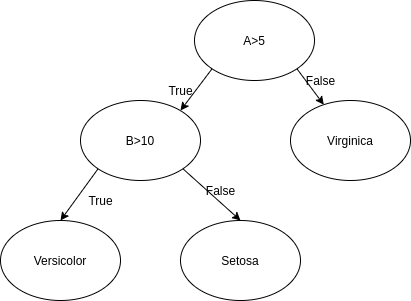
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




In [50]:
with open("outputimp.txt","w") as f:
    dfs(tree_entropy,0,f)
print("Decision tree with entropy saved in outputimp.txt")

Decision tree with entropy saved in outputimp.txt


4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

**Removing correlated features wont have a effect on the decision tree accuracy as highly correlated also gets divided as seen in the output tree UCSIZE and UCSHAPE are highly corelated and hence after the splitting with UCSIZE the UCSHAPE rarely occurs**

5. Report the advantages and disadvantages of decision trees based on the above question.

Answer:
- **Advantage** In decision tree normalisation isn't required, it is easy to understand and explain
- **Disadvantages** Training time is comparatively higher